# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key
city_weather = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'weather.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={city_weather}&q="
print (query_url)

# define count of pass throughs
count_one = 0
set_one = 1


http://api.openweathermap.org/data/2.5/weather?appid=55bbc333a4a19a51965ecc66c0b4cf37&units=imperial&q=


## Generate Cities List

In [2]:
# List for lat_long and cities
lat_long = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_long = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_long:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 25:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Printing City Records {count_one} of Set {set_one} | {city}")
    except Exception:
        print("Null value. Skip...")


Printing City Records 1 of Set 1 | saint-leu
Null value. Skip...
Printing City Records 2 of Set 1 | busselton
Printing City Records 3 of Set 1 | hobart
Printing City Records 4 of Set 1 | rio grande
Printing City Records 5 of Set 1 | hermanus
Printing City Records 6 of Set 1 | qaanaaq
Printing City Records 7 of Set 1 | puerto ayora
Printing City Records 8 of Set 1 | bluff
Printing City Records 9 of Set 1 | port alfred
Printing City Records 10 of Set 1 | ushuaia
Printing City Records 11 of Set 1 | mahibadhoo
Printing City Records 12 of Set 1 | chokurdakh
Printing City Records 13 of Set 1 | emirdag
Printing City Records 14 of Set 1 | fortuna
Printing City Records 15 of Set 1 | east london
Printing City Records 16 of Set 1 | provideniya
Null value. Skip...
Printing City Records 17 of Set 1 | matamoros
Printing City Records 18 of Set 1 | kungurtug
Printing City Records 19 of Set 1 | ponta do sol
Printing City Records 20 of Set 1 | flinders
Null value. Skip...
Printing City Records 21 of Set

Printing City Records 13 of Set 7 | souillac
Printing City Records 14 of Set 7 | nyagan
Printing City Records 15 of Set 7 | goderich
Printing City Records 16 of Set 7 | mys shmidta
Printing City Records 17 of Set 7 | ipixuna
Printing City Records 18 of Set 7 | nipawin
Printing City Records 19 of Set 7 | mgandu
Printing City Records 20 of Set 7 | srednekolymsk
Null value. Skip...
Printing City Records 21 of Set 7 | carnarvon
Printing City Records 22 of Set 7 | talara
Printing City Records 23 of Set 7 | lavrentiya
Printing City Records 24 of Set 7 | port-gentil
Printing City Records 25 of Set 7 | portland
Printing City Records 26 of Set 7 | chivacoa
Printing City Records 1 of Set 8 | abdulino
Printing City Records 2 of Set 8 | kapaa
Null value. Skip...
Printing City Records 3 of Set 8 | antalya
Printing City Records 4 of Set 8 | perth
Printing City Records 5 of Set 8 | bundaberg
Printing City Records 6 of Set 8 | tadine
Printing City Records 7 of Set 8 | kloulklubed
Printing City Records

Printing City Records 5 of Set 14 | alexandria
Printing City Records 6 of Set 14 | vytegra
Printing City Records 7 of Set 14 | dingle
Printing City Records 8 of Set 14 | hambantota
Printing City Records 9 of Set 14 | nyurba
Printing City Records 10 of Set 14 | cape canaveral
Printing City Records 11 of Set 14 | coari
Printing City Records 12 of Set 14 | lewistown
Printing City Records 13 of Set 14 | sayyan
Printing City Records 14 of Set 14 | wakkanai
Null value. Skip...
Printing City Records 15 of Set 14 | kudahuvadhoo
Printing City Records 16 of Set 14 | kangaatsiaq
Printing City Records 17 of Set 14 | ancud
Null value. Skip...
Printing City Records 18 of Set 14 | balaipungut
Printing City Records 19 of Set 14 | rurrenabaque
Printing City Records 20 of Set 14 | fenoarivo atsinanana
Printing City Records 21 of Set 14 | marzuq
Printing City Records 22 of Set 14 | komsomolskiy
Printing City Records 23 of Set 14 | nadym
Printing City Records 24 of Set 14 | guarapari
Printing City Records

Printing City Records 18 of Set 20 | maniitsoq
Printing City Records 19 of Set 20 | hun
Printing City Records 20 of Set 20 | half moon bay
Printing City Records 21 of Set 20 | saraipali
Printing City Records 22 of Set 20 | ranong
Null value. Skip...
Printing City Records 23 of Set 20 | carutapera
Printing City Records 24 of Set 20 | erzin
Printing City Records 25 of Set 20 | tomatlan
Printing City Records 26 of Set 20 | tahoua
Printing City Records 1 of Set 21 | havre-saint-pierre
Printing City Records 2 of Set 21 | price
Printing City Records 3 of Set 21 | bambanglipuro
Printing City Records 4 of Set 21 | alice springs
Printing City Records 5 of Set 21 | nacala
Printing City Records 6 of Set 21 | andreapol
Printing City Records 7 of Set 21 | kalevala
Printing City Records 8 of Set 21 | vardo
Printing City Records 9 of Set 21 | abha
Printing City Records 10 of Set 21 | porto walter


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudy":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Hum":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Temp":max_temps,
    "Wind":wind_speeds
}


In [5]:
weather_dataframe = pd.DataFrame(weather_dict)

In [6]:
weather_dataframe.head()

,City,Cloudy,Country,Date,Hum,Lat,Lng,Temp,Wind
0,saint-leu,94,RE,1573299366,54,-21.15,55.28,82.40,8.05
1,busselton,88,AU,1573299233,66,-33.64,115.35,71.15,13.65
2,hobart,75,AU,1573299055,57,-42.88,147.33,51.80,8.05
3,rio grande,1,US,1573299261,74,41.11,-90.40,30.99,9.17
4,hermanus,22,ZA,1573299236,58,-34.42,19.24,88.00,18.01


In [7]:
weather_dataframe.to_csv(output_data_file)

In [8]:
weather_dataframe.count()

City       530
Cloudy     530
Country    530
Date       530
Hum        530
Lat        530
Lng        530
Temp       530
Wind       530
dtype: int64

In [9]:
weather_dataframe.head()

,City,Cloudy,Country,Date,Hum,Lat,Lng,Temp,Wind
0,saint-leu,94,RE,1573299366,54,-21.15,55.28,82.40,8.05
1,busselton,88,AU,1573299233,66,-33.64,115.35,71.15,13.65
2,hobart,75,AU,1573299055,57,-42.88,147.33,51.80,8.05
3,rio grande,1,US,1573299261,74,41.11,-90.40,30.99,9.17
4,hermanus,22,ZA,1573299236,58,-34.42,19.24,88.00,18.01


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

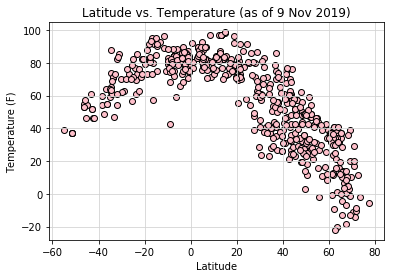

In [10]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Temp"],edgecolors="black",facecolors="pink")
plt.title("Latitude vs. Temperature (as of 9 Nov 2019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("LatvsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

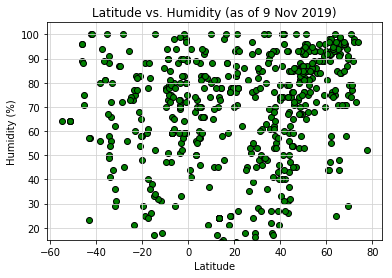

In [11]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Hum"],edgecolors="black",facecolors="green")
plt.title("Latitude vs. Humidity (as of 9 Nov 2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("LatvsHum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

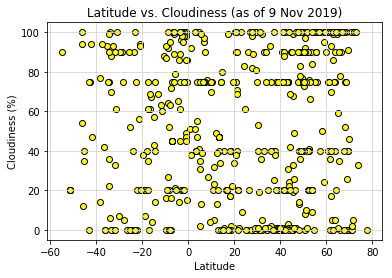

In [12]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudy"],edgecolors="black",facecolors="yellow")
plt.title("Latitude vs. Cloudiness (as of 9 Nov 2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("LatvsCloudy.png")
plt.show()

#### Latitude vs. Wind Speed Plot

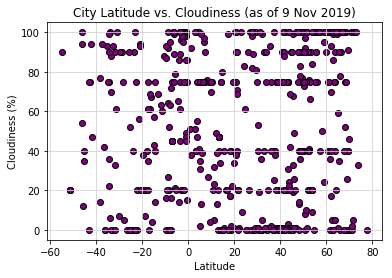

In [13]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudy"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Cloudiness (as of 9 Nov 2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("LatvsWind.png")
plt.show()